In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression



# feature engineering 

In [189]:
df = pd.read_csv('../data/try.csv')

## dealing with nulls 

In [190]:
df.isnull().sum()

Unnamed: 0            0
user_id               0
id                    0
title                 0
price                 0
content              96
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                180
street_width        217
age                 734
last_update           0
ketchen              19
ac                   21
furnished            49
location              0
path                  0
user                  0
district              0
width              2221
length             2221
advertiser_type     227
create_time           0
review              406
profileImg         2766
UserName             92
iam_verified        142
rega_id               0
DayOfRent             0
timeBeforeRent        0
onMarket              0
dtype: int64

<AxesSubplot:>

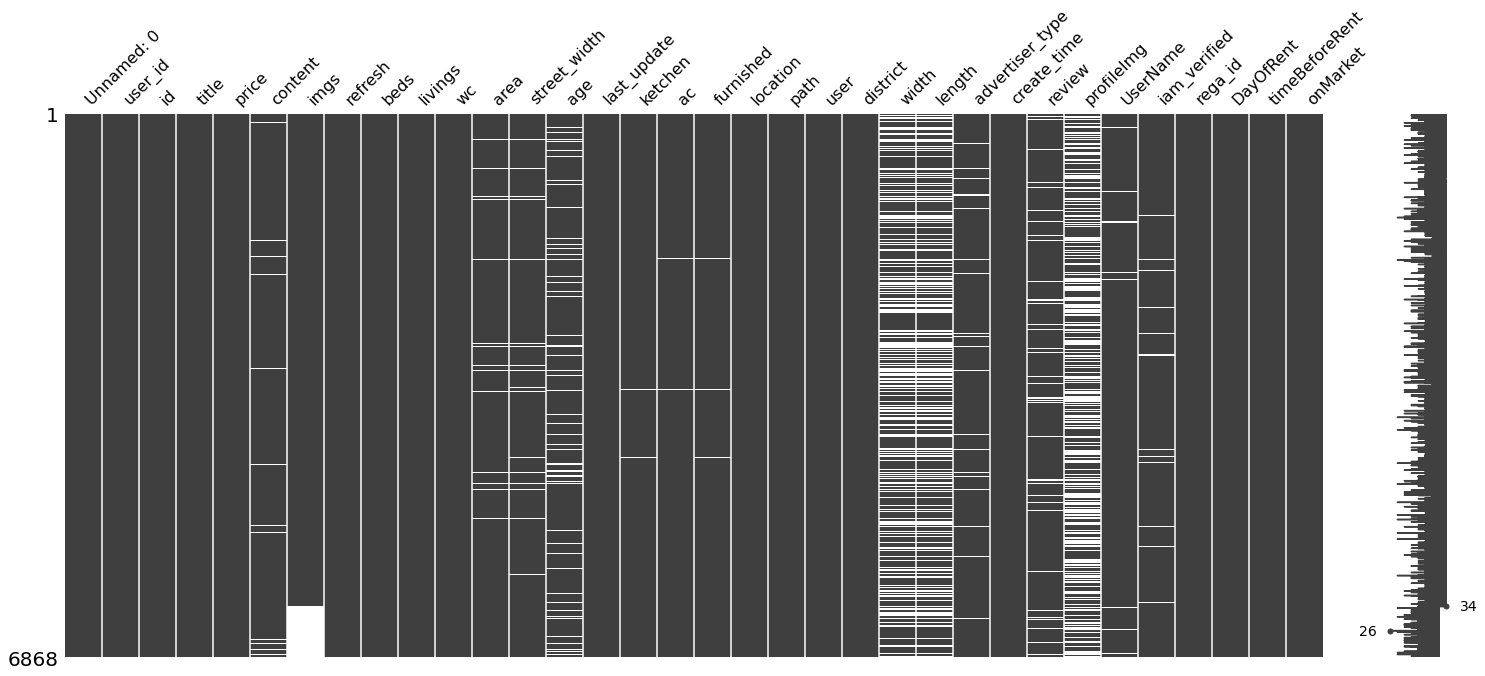

In [191]:
msno.matrix(df)


fill na with null becouse there it eather you have a profile image or not 

In [192]:
df['profileImg'].fillna(False , inplace=True)

i don't need the jpg link i just want to know if the dealer has img or not 

In [193]:
for index , row in df.iterrows()   :
    # print(row['profileImg'] )
     if (row['profileImg'] != False) :
        df['profileImg'][index] = True

/tmp/ipykernel_13341/3280180632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][index] = True


In [194]:
df['profileImg'].value_counts()

True     4102
False    2766
Name: profileImg, dtype: int64

for the content i don't care about the content it self sense there isn't a lot of time for NLP i want to see if how much did the dealer wrote so 
<br></br>i fill the null with zero since  zero mean there isn't contet (i check this manually  ) 

In [195]:
df['content'].fillna('0' , inplace=True)

took the length of the rest of the observatoins 

In [196]:
for index , row in df.iterrows():
    df['content'][index] = len(row['content'])

/tmp/ipykernel_13341/3469686288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][index] = len(row['content'])


filled of the verified with False (check manually that this is true and also make since(if verified then it to have it ))

In [197]:
df['iam_verified'].value_counts()

True     6714
False      12
Name: iam_verified, dtype: int64

In [198]:
df['iam_verified'].fillna(False , inplace=True)

In [199]:
df['iam_verified'].value_counts()

True     6714
False     154
Name: iam_verified, dtype: int64

In [200]:
a = df['imgs'][0]
a

"['023693808_1655558922785.jpg', '023693809_1655558922854.jpg', '023693806_1655558922809.jpg', '023693807_1655558922822.jpg', '023693805_1655558922826.jpg', '023693806_1655558922970.jpg', '023693806_1655558922967.jpg', '023693802_1655558922982.jpg', '023693802_1655558923025.jpg', '023693802_1655558923026.jpg']"

for imgs unfortunately  there is no lot of time for computer vision so i want to see how many imgs there are in each post 

NA means there are no photo are added 

In [201]:
df['imgs'].fillna(0 , inplace = True)

In [202]:
df['imgs']

0       ['023693808_1655558922785.jpg', '023693809_165...
1       ['025906606_1658173184866.jpg', '025906605_165...
2       ['000197784_1656715448086.jpg', '000197781_165...
3       ['004057808_1659204498575.jpg', '004057807_165...
4       ['000163913_1659455687047.jpg', '000163910_165...
                              ...                        
6863                                                    0
6864                                                    0
6865                                                    0
6866                                                    0
6867                                                    0
Name: imgs, Length: 6868, dtype: object

it shows as list so convert the sting to a list  then took the length this will give me how many imgs in each post

In [203]:
for index , row in df.iterrows():
    if row['imgs'] == 0 :
        continue
    else:
        a= row['imgs']
        df['imgs'][index] = len(ast.literal_eval(a))

/tmp/ipykernel_13341/4095940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imgs'][index] = len(ast.literal_eval(a))


the mode is 8 

In [204]:
df['imgs'].value_counts()

8     930
0     643
7     557
6     531
5     466
9     435
10    388
4     368
1     334
11    329
12    309
3     259
13    210
14    181
15    165
16    152
2     131
17    100
18     90
19     59
21     39
20     35
22     31
23     24
26     23
24     21
27     16
30     15
25     11
28     10
29      4
31      1
37      1
Name: imgs, dtype: int64

In [205]:
try:
    df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
except:
    t=1

In [206]:
df[['width' , 'length' , 'area']].isna().sum()

width     2221
length    2221
area       180
dtype: int64

the coorelation is high between the length and area and there are many features that is missing so i decided to remove (length , width) 

In [207]:
rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = df[['width' , 'length' , 'area']].corr()
corr.style.background_gradient(cmap='coolwarm')

,width,length,area
width,1.000000,0.028564,0.036197
length,0.028564,1.000000,0.999613
area,0.036197,0.999613,1.000000


In [208]:
df.drop(['width', 'length'] , axis=1 , inplace=True)

In [209]:
df.isna().sum()

user_id              0
id                   0
title                0
price                0
content              0
imgs                 0
refresh              0
beds                 0
livings              2
wc                   0
area               180
street_width       217
age                734
last_update          0
ketchen             19
ac                  21
furnished           49
location             0
path                 0
user                 0
district             0
advertiser_type    227
create_time          0
review             406
profileImg           0
UserName            92
iam_verified         0
rega_id              0
DayOfRent            0
timeBeforeRent       0
onMarket             0
dtype: int64

In [210]:
df['UserName'].isna().sum()

92

## for UserName column there are some of the featutre are missing but it is the same as user_id so i decide to remove the userName column

In [211]:
df['UserName'].value_counts()

‏مؤسسة الحلم العربي              280
بوابه النهضه للخدمات العقاريه    163
مكتب عقاري                       100
مكتب عقاري مميز                   91
مؤسسة نبل العقارية                78
                                ... 
عبدالرحمن الموسى                   1
عبدالله                            1
saif                               1
مكتب عبيد للعقارات                 1
naif                               1
Name: UserName, Length: 1478, dtype: int64

In [212]:
df['user_id'].value_counts() 

1992649    280
901785     162
2072661     91
1958104     88
345254      78
          ... 
1798196      1
950517       1
2087320      1
393994       1
730067       1
Name: user_id, Length: 1774, dtype: int64

In [213]:
df.loc[df['user_id'] == 1992649]['UserName']

22      ‏مؤسسة الحلم العربي
31      ‏مؤسسة الحلم العربي
69      ‏مؤسسة الحلم العربي
84      ‏مؤسسة الحلم العربي
91      ‏مؤسسة الحلم العربي
               ...         
6780    ‏مؤسسة الحلم العربي
6789    ‏مؤسسة الحلم العربي
6805    ‏مؤسسة الحلم العربي
6818    ‏مؤسسة الحلم العربي
6849    ‏مؤسسة الحلم العربي
Name: UserName, Length: 280, dtype: object

In [214]:
df.drop(['UserName'], axis=1 , inplace=True)

for the review i fill the NAs with the median since it is a skewed distribution

<AxesSubplot:>

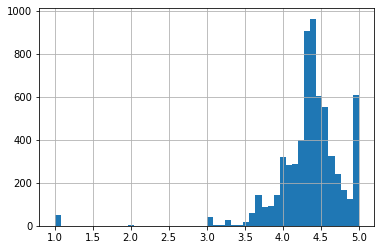

In [215]:
df["review"].hist(bins=50)

In [216]:
df["review"].fillna(df.review.median() , inplace=True)

<AxesSubplot:>

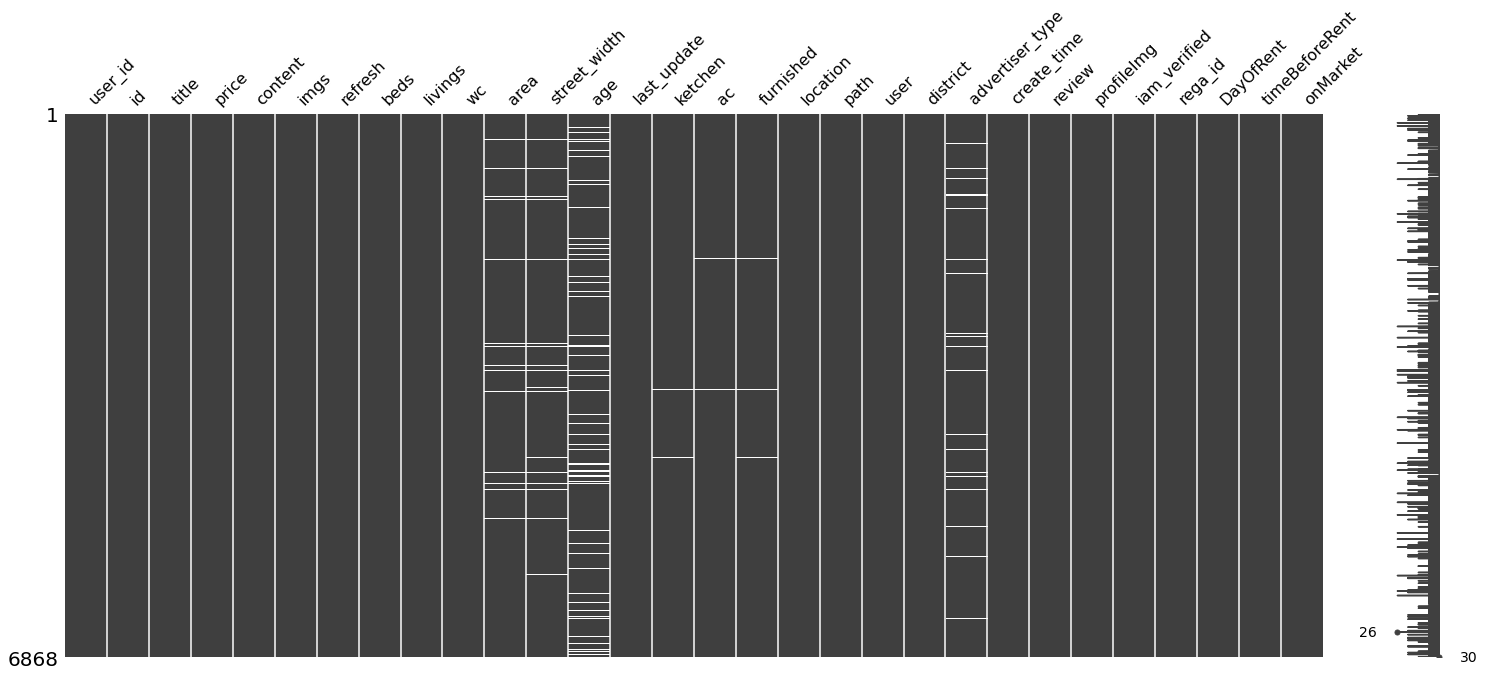

In [217]:
msno.matrix(df)


In [218]:
df['area' ].isnull().sum()

180

In [219]:
df['street_width' ].isnull().sum()

217

all value that are null in area is null in street_width except of 35 so i decided instead of doing any Imputation i dropped these nulls 

In [220]:


df[['area' , 'street_width']].isnull().apply(lambda x: all(x), axis=1).sum()

180

In [221]:
df = df.dropna(subset=['area' , 'street_width'])

In [222]:
df['furnished'].isna().sum()

25

In [223]:
df['furnished'].value_counts()

0.0    6105
1.0     521
Name: furnished, dtype: int64

by observation on 50% of the nulls value that are still existing i filled the value with 0  

In [224]:
df['furnished'].fillna(0 , inplace=True)

In [225]:
df['advertiser_type'].isna().sum()

159

In [226]:
df['age']

0        0.0
1        NaN
2        1.0
3        4.0
4       10.0
        ... 
6862     0.0
6864     4.0
6865     6.0
6866     0.0
6867    27.0
Name: age, Length: 6651, dtype: float64

In [227]:
df['age'].isna().sum()

694

right skweed so i choose to use median 

<AxesSubplot:>

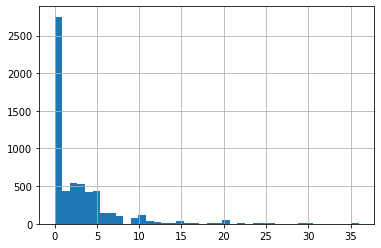

In [228]:
df['age'].hist(bins=40)

In [229]:
df['age'].median()

1.0

In [230]:
df['age'].isna().sum()

694

In [231]:
df['age'].median()

1.0

In [232]:
df['age'].fillna(df['age'].median() , inplace=True)

<AxesSubplot:>

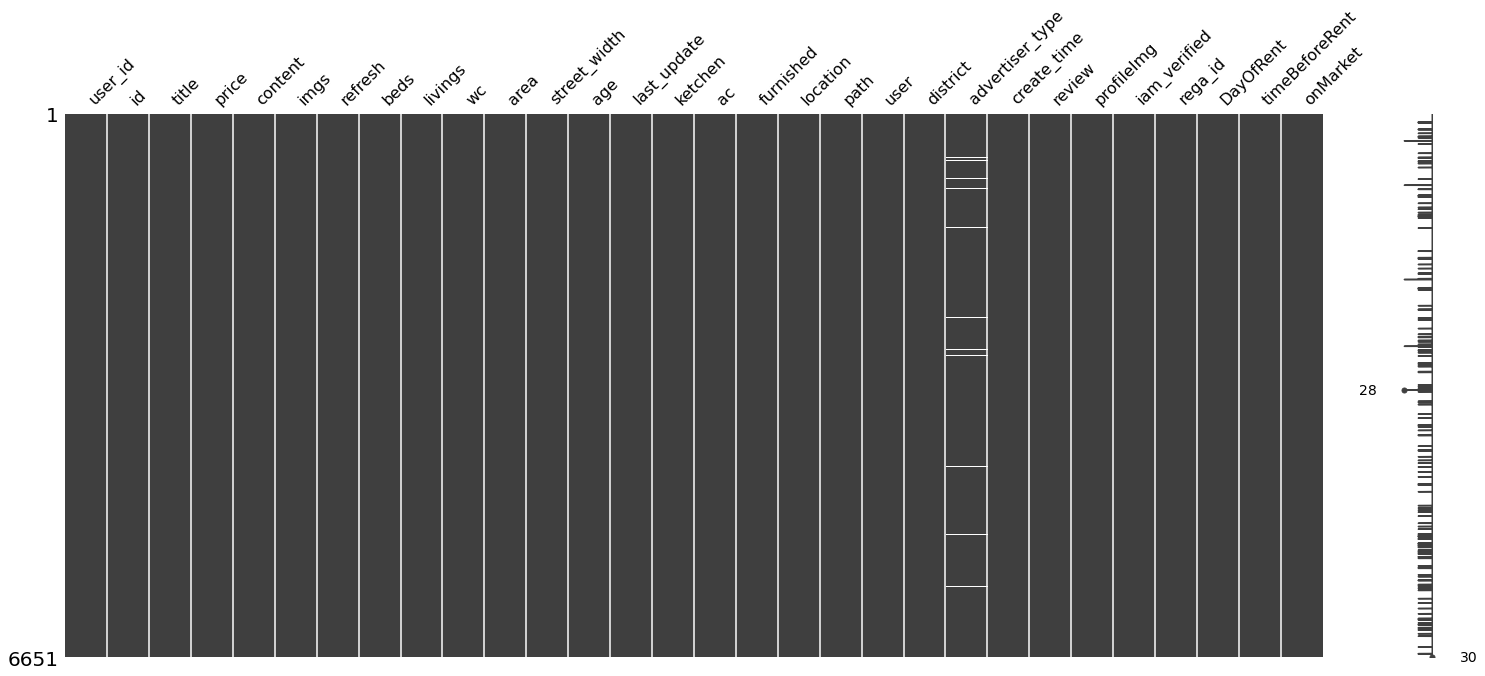

In [233]:
msno.matrix(df)


In [234]:
df['furnished'].value_counts()

0.0    6130
1.0     521
Name: furnished, dtype: int64

filled the data with the mode

In [235]:
df['furnished'].isna().sum()

0

In [236]:
df['furnished'].fillna(0 , inplace=True)

i fill the data with the previous row for advertiser_type

In [237]:
df['advertiser_type'].isna().sum()

159

In [238]:
df['advertiser_type'].value_counts()

exclusive_marketer    2509
normal_marketer       1737
owner                 1592
agent                  654
Name: advertiser_type, dtype: int64

In [239]:
df['advertiser_type']= df['advertiser_type'].fillna(method='pad')

In [240]:
df.isna().sum()

user_id            0
id                 0
title              0
price              0
content            0
imgs               0
refresh            0
beds               0
livings            1
wc                 0
area               0
street_width       0
age                0
last_update        0
ketchen            6
ac                 7
furnished          0
location           0
path               0
user               0
district           0
advertiser_type    0
create_time        0
review             0
profileImg         0
iam_verified       0
rega_id            0
DayOfRent          0
timeBeforeRent     0
onMarket           0
dtype: int64

fill the rest with the previous row 

In [241]:
df= df.fillna(method='pad')

# feature engineering

we don't need this feature since we add lat as new column

In [242]:
df.drop(['location'] , axis = 1 , inplace=True)

## convert strings to numrical

In [243]:
df['title']

0       شقة للإيجار في حي ، شارع عبدالله غازي ، حي الق...
1       شقة للإيجار في شارع رقم 228 ، حي النرجس ، الري...
2       شقة للإيجار في شارع أبي العباس الصقلي ، حي الم...
3       شقة للإيجار في شارع الكراني ، حي الاندلس ، الر...
4       شقة للإيجار في شارع حمود بن سبيل ، حي الجرادية...
                              ...                        
6862    شقة للإيجار في شارع النقلة ، حي الصحافة ، الري...
6864    شقة للإيجار في شارع محمد بن عبدالباقي سنبل ، ح...
6865    شقة للإيجار في شارع ارام ، حي القادسية ، الريا...
6866    شقة للإيجار في شارع محمد بن البياني ، حي طويق ...
6867    شقة للإيجار في شارع الإمام أبي حنيفة ، حي العر...
Name: title, Length: 6651, dtype: object

we can't make a NLP for this feature so i decided to take the length of the text 

In [244]:
for index , row in df.iterrows():
    if row['title'] == 0 :
        continue
    else:
        # a= 
        df['title'][index] = len(row['title'])

/tmp/ipykernel_13341/1017281869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][index] = len(row['title'])


In [245]:
df['title'].value_counts()

57     841
58     414
59     382
56     353
42     338
      ... 
102      1
47       1
21       1
31       1
29       1
Name: title, Length: 68, dtype: int64

##  refresh and last update 

In [246]:
(df['refresh']==df['last_update'])

0        True
1        True
2        True
3       False
4       False
        ...  
6862     True
6864     True
6865     True
6866     True
6867     True
Length: 6651, dtype: bool

In [247]:
df[df['refresh']==df['last_update']].value_counts().sum()

5439

In [248]:
df[df['refresh']==df['last_update']].value_counts().sum()/len(df)

0.8177717636445647

81% of the observation are duplicates so i desides to remove the refresh column (the rest i belive there small changes +-5 second)

In [249]:
df.drop('refresh', axis=1 , inplace=True)

in the EDA we can see that these values are making the data unpalnced 

In [250]:
df[df['area'] > 1000].shape[1]

28

In [251]:
df = df[df['area'] <= 1000]

from the path column i want it shows somthing like this 

In [252]:
df['path'][0] 

'/شقق-للإيجار/الرياض/شمال-الرياض/حي-القيروان/حي-شارع-عبدالله-غازي-حي-القيروان-الرياض-الرياض-4438549'

in the site they divide there pages into category/city/in-which-side-of-the-city/district/title/id

category {apartment , lands .... etc} 

in-which-side-of-the-city : {north , center , west ... }

district : Neighborhood

all these info i have except of the in-which-side-of-the-city  is the apartment so i create the new column for it

In [253]:
df['zone'] = ''

In [254]:
for index , row in df.iterrows():
    a = row['path'].split('/')[3]
    df['zone'][index] = a.split('-')[0]


/tmp/ipykernel_13341/233973366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'][index] = a.split('-')[0]


North

East

West

center

South

In [255]:
df['zone'].value_counts()

شمال    3646
شرق     2241
غرب      512
وسط      133
جنوب     104
Name: zone, dtype: int64

i don't need the path anymore

In [256]:
df.drop('path' , axis=1 , inplace=True)

In [257]:
# df.loc[df["zone"] == "شمال", "zone"] = 1
# df.loc[df["zone"] == "شرق", "zone"] = 2
# df.loc[df["zone"] == "غرب", "zone"] = 3
# df.loc[df["zone"] == "وسط", "zone"] = 4
# df.loc[df["zone"] == "جنوب", "zone"] = 5

In [258]:
label_encoder = preprocessing.LabelEncoder()


In [259]:
# df['zone'] = label_encoder.fit_transform(df['zone'])

In [260]:
df['zone'].value_counts()

شمال    3646
شرق     2241
غرب      512
وسط      133
جنوب     104
Name: zone, dtype: int64

In [261]:
# df['district'] = label_encoder.fit_transform(df['district'])

In [262]:
df['district'].value_counts()

حي النرجس             777
حي العارض             696
حي الملقا             563
حي اليرموك            392
حي الياسمين           336
                     ... 
حي المروة               1
حي سكيرينة              1
حي الوشام               1
حي الديرة               1
حي الملك عبدالعزيز      1
Name: district, Length: 127, dtype: int64

we have to deal with datetime i decided to create new columns for year , month , day 

In [263]:

df['createYEAR'] = 0
df['createMONTH'] = 0
df['createDAY']= 0
df['lUpdateYEAR']= 0
df['lUpdateMONTH'] = 0
df['lUpdateDAY'] = 0
df['createDAY']= 0 

In [264]:
for index , row in df.iterrows():
    df['createYEAR'][index] = df['create_time'][index][7:9]
    df['createDAY'][index]  = df['create_time'][index][10:12]
    df['createMONTH'][index] =  df['create_time'][index][7:9]

/tmp/ipykernel_13341/59881292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createYEAR'][index] = df['create_time'][index][7:9]
/tmp/ipykernel_13341/59881292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createDAY'][index]  = df['create_time'][index][10:12]
/tmp/ipykernel_13341/59881292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createMONTH'][index] =  df['create_time'][index][7:9]


In [265]:
# New_df['create_time'] = New_df['create_time'].astype('datetime64' )

In [266]:
for index , row in df.iterrows():
    df['lUpdateYEAR'][index] = df['last_update'][index][7:9]
    df['lUpdateDAY'][index]  = df['last_update'][index][10:12]
    df['lUpdateMONTH'][index] =  df['last_update'][index][7:9]

/tmp/ipykernel_13341/3723726410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lUpdateYEAR'][index] = df['last_update'][index][7:9]
/tmp/ipykernel_13341/3723726410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lUpdateDAY'][index]  = df['last_update'][index][10:12]
/tmp/ipykernel_13341/3723726410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lUpdateMONTH'][index] =  df['last_update'][index][7:9]


In [267]:

# df['createYEAR'] = df['createYEAR'].astype('int64')
# df['createMONTH'] = df['createMONTH'].astype('int64')
# df['createDAY']=  df['createDAY'].astype('int64')
# df['lUpdateYEAR']=  df['lUpdateYEAR'].astype('int64')
# df['lUpdateMONTH'] = df['lUpdateMONTH'].astype('int64')
# df['lUpdateDAY'] = df['lUpdateDAY'].astype('int64')
# df['createDAY']=   df['createDAY'].astype('int64')

drop previous column

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6867
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6636 non-null   int64  
 1   id               6636 non-null   int64  
 2   title            6636 non-null   object 
 3   price            6636 non-null   int64  
 4   content          6636 non-null   int64  
 5   imgs             6636 non-null   int64  
 6   beds             6636 non-null   int64  
 7   livings          6636 non-null   float64
 8   wc               6636 non-null   int64  
 9   area             6636 non-null   float64
 10  street_width     6636 non-null   float64
 11  age              6636 non-null   float64
 12  last_update      6636 non-null   object 
 13  ketchen          6636 non-null   float64
 14  ac               6636 non-null   float64
 15  furnished        6636 non-null   float64
 16  user             6636 non-null   object 
 17  district      

In [269]:
try:
    df.drop(['create_time' , 'last_update'] ,axis=1 , inplace=True)
except:
    XX = 1

create the target column that is depends on DayOfRent

In [270]:
df['isRent'] = 0
df['isRent'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

In [271]:
df['isRent'].value_counts()

True     3418
False    3218
Name: isRent, dtype: int64

In [272]:
df['user_id'] = df['user_id'].astype('object')

In [273]:
# df['user_id'] = label_encoder.fit_transform(df['user_id'])

In [274]:
df.rename(columns = {'title':'len_of_title', 'content':'len_of_content' , 'imgs' : 'img_in_posd'}, inplace = True)


In [275]:
df['len_of_title'] = df['len_of_title'].astype('int64')

In [276]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6867
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6636 non-null   object 
 1   id               6636 non-null   int64  
 2   len_of_title     6636 non-null   int64  
 3   price            6636 non-null   int64  
 4   len_of_content   6636 non-null   int64  
 5   img_in_posd      6636 non-null   int64  
 6   beds             6636 non-null   int64  
 7   livings          6636 non-null   float64
 8   wc               6636 non-null   int64  
 9   area             6636 non-null   float64
 10  street_width     6636 non-null   float64
 11  age              6636 non-null   float64
 12  ketchen          6636 non-null   float64
 13  ac               6636 non-null   float64
 14  furnished        6636 non-null   float64
 15  user             6636 non-null   object 
 16  district         6636 non-null   object 
 17  advertiser_typ

In [277]:
df= df[df['onMarket'] < 120]
# onMarket1= df[df['onMarket'] < 120]

In [278]:
df.shape[0]

6171

In [279]:
df.isnull().sum().sum()

0

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 0 to 6867
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6171 non-null   object 
 1   id               6171 non-null   int64  
 2   len_of_title     6171 non-null   int64  
 3   price            6171 non-null   int64  
 4   len_of_content   6171 non-null   int64  
 5   img_in_posd      6171 non-null   int64  
 6   beds             6171 non-null   int64  
 7   livings          6171 non-null   float64
 8   wc               6171 non-null   int64  
 9   area             6171 non-null   float64
 10  street_width     6171 non-null   float64
 11  age              6171 non-null   float64
 12  ketchen          6171 non-null   float64
 13  ac               6171 non-null   float64
 14  furnished        6171 non-null   float64
 15  user             6171 non-null   object 
 16  district         6171 non-null   object 
 17  advertiser_typ

In [282]:
df.to_csv('../data/tryML.csv' , index=False)

no sign of overfitting.